In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
#Read Data
data = pd.read_csv("processed_database_2.csv", low_memory=False)

#Features List
features = data.iloc[:, 1:].columns.tolist()

data_train = data.sample(frac=0.8)
data_test = data.drop(index=data_train.index)

X_train = data_train.iloc[:, 1:].reset_index(drop=True)
X_test = data_test.iloc[:, 1:].reset_index(drop=True)

X_train.insert(0, "ones", np.ones((X_train.shape[0],1)))
X_test.insert(0, "ones", np.ones((X_test.shape[0],1)))

Y_train = data_train.iloc[:, :1].values
Y_test = data_test.iloc[:, :1].values

beta = np.zeros([1, len(features)+1])

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, beta.shape)

(469338, 16) (117334, 16) (469338, 1) (117334, 1) (1, 16)


In [4]:
def mse(Y_true, Y_pred):
    mse_ = np.mean((Y_true-Y_pred) ** 2)
    return mse_

In [5]:
def gradient_descent(
    X_train, Y_train, beta, iterations, learning_rate, patience=10, min_delta=1e-3
):
    n = len(X_train)
    best_cost = np.inf
    patience_counter = 0

    costs = []
    for i in range(iterations):
        Y_pred = np.dot(X_train, beta.T)

        cost = mse(Y_train, Y_pred)
        costs.append(cost)

        gradient = (1 / n) * np.dot(X_train.T, (Y_pred - Y_train))

        beta -= learning_rate * gradient.T

        if (i + 1) % 100 == 0:
            print(f"Iteration: {i+1}, Training Cost: {round(cost, 5)}")

        if cost + min_delta < best_cost:
            patience_counter = 0
            best_cost = cost
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stop at iteration {i}. Training Cost: {round(cost, 5)}")
                break

    return beta, costs

In [6]:
final_beta, costs = gradient_descent(X_train, Y_train, beta, iterations=10000, learning_rate=0.001)
print(f"Final beta: \n{final_beta}")

Iteration: 100, Training Cost: 918.28403
Iteration: 200, Training Cost: 779.80576
Iteration: 300, Training Cost: 671.77956
Iteration: 400, Training Cost: 586.07859
Iteration: 500, Training Cost: 517.31111
Iteration: 600, Training Cost: 461.71288
Iteration: 700, Training Cost: 416.53751
Iteration: 800, Training Cost: 379.70984
Iteration: 900, Training Cost: 349.62078
Iteration: 1000, Training Cost: 324.99961
Iteration: 1100, Training Cost: 304.83037
Iteration: 1200, Training Cost: 288.29403
Iteration: 1300, Training Cost: 274.72674
Iteration: 1400, Training Cost: 263.58854
Iteration: 1500, Training Cost: 254.4392
Iteration: 1600, Training Cost: 246.91924
Iteration: 1700, Training Cost: 240.73481
Iteration: 1800, Training Cost: 235.64557
Iteration: 1900, Training Cost: 231.45475
Iteration: 2000, Training Cost: 228.00127
Iteration: 2100, Training Cost: 225.15316
Iteration: 2200, Training Cost: 222.8023
Iteration: 2300, Training Cost: 220.86006
Iteration: 2400, Training Cost: 219.25377
Ite

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(costs)), costs, "b")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Iteration vs Cost (Neural Network)")

fig.savefig("neural_cost")

Text(0.5, 1.0, 'Iteration vs Cost')

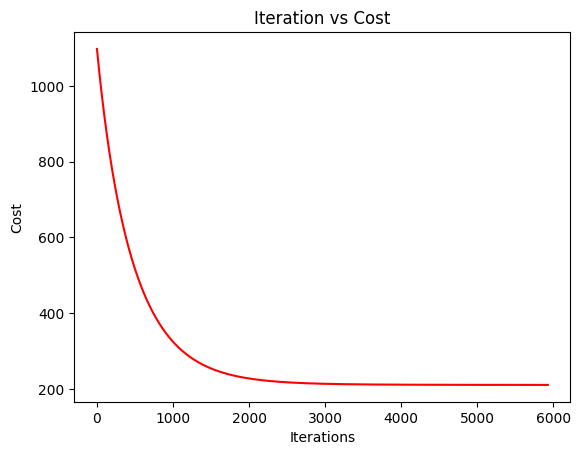

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(costs)), costs, "r")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Iteration vs Cost")

In [ ]:
Y_pred_train = np.dot(X_train, final_beta.T)
residuals_train = Y_train.T - Y_pred_train
train_cost = mse(Y_train.T, Y_pred_train)
print(f"Training cost: {np.squeeze(train_cost).round(2)}")

fig, ax = plt.subplots()
ax.scatter(Y_train, Y_pred_train, (0.01))
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value")
ax.set_title("Actual vs Prediction (Linear Regression, Train)")

ax.plot(np.arange(100), np.arange(100), "r")
fig.savefig("linear_train_pred")


fig, ax = plt.subplots()
ax.set_autoscale_on(False)
ax.scatter(Y_train, residuals_train, (0.01))
ax.set_xbound(-50, 100)
ax.set_ybound(-100, 100)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Residual")
ax.set_title("Predicted Value vs Residual (Linear Regression, Train)")

ax.plot(np.arange(150)-50, np.zeros((150,)), "black")

fig.savefig("linear_train_resd")

In [ ]:
Y_pred_test = np.dot(X_test, final_beta.T)
residuals_test = Y_test.T - Y_pred_test
test_cost = mse(Y_test.T, Y_pred_test)
print(f"Training cost: {np.squeeze(test_cost).round(2)}")

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred_test, (0.01))
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value")
ax.set_title("Actual vs Prediction (Linear Regression, Test)")

ax.plot(np.arange(100), np.arange(100), "r")
fig.savefig("linear_test_pred")


fig, ax = plt.subplots()
ax.set_autoscale_on(False)
ax.scatter(Y_pred_test, residuals_test, (0.01))
ax.set_xbound(-50, 100)
ax.set_ybound(-100, 100)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Residual")
ax.set_title("Predicted Value vs Residual (Linear Regression, Test)")

ax.plot(np.arange(150)-50, np.zeros((150,)), "black")

fig.savefig("linear_test_resd")